#**0) Settings**

In order to execute all the softwares, you need to use the  [pyqsp package](https://github.com/ichuang/pyqsp).

In [ ]:
!pip install qiskit ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-vro1bl0y
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-vro1bl0y
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 85ba91fef057a425cd2cb7ce58999e9334b75f4c
  Preparing metadata (setup.py) ... done


In [ ]:
pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pdflatex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached attrs-18.2.0-py2.py3-none-any.whl (34 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 21.4.0
    Uninstalling attrs-21.4.0:
      Successfully uninstalled attrs-21.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qcs-api-client 0.21.3 requires attrs<22.0.0,>=21.3.0, but you have attrs 18.2.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append(<pyqsp path>)

In [ ]:
pip install cirq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 18.2.0
    Uninstalling attrs-18.2.0:
      Successfully uninstalled attrs-18.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdflatex 0.1.3 requires attrs<19.0,>=18.2, but you have attrs 21.4.0 which is incompatible.


#**1) Testing the Quantum Signal Processing Software**

In [ ]:
from pyqsp.poly import *
from pyqsp.response import *
from pyqsp.angle_sequence import *
from pyqsp.phases import * 

In [ ]:
poly = PolySign()
pcoefs = poly.generate(degree=3, delta=10, ensure_bounded=True, return_scale=False)
ang_seq = QuantumSignalProcessingPhases(pcoefs, method = 'laurent')

[pyqsp.poly.PolySign] degree=3, delta=10
[PolyTaylorSeries] max [0.86080557] is at [0.85772863]: normalizing
[PolyTaylorSeries] average error = 0.33312549219985266 in the domain [-1, 1] using degree 3


In [ ]:
pcoefs

TargetPolynomial([ 0.        ,  1.57392025,  0.        , -0.71311468], domain=[-1,  1], window=[-1,  1])

In [ ]:
ang_seq

[-1.7165968800889577,
 0.6641903108755276,
 0.6641903108755278,
 -0.14580055329406139]

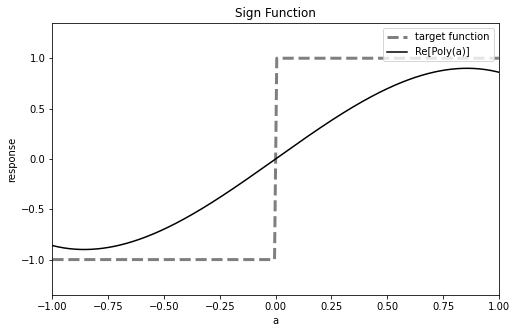

In [ ]:
PlotQSPResponse(ang_seq, target=lambda x: np.sign(x), signal_operator="Wx", title="Sign Function", plot_real_only=True)

/content/drive/MyDrive/Telecom/PRIM/master/pyqsp/response.py:208: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(phiset, markerfmt='bo', basefmt='k-')


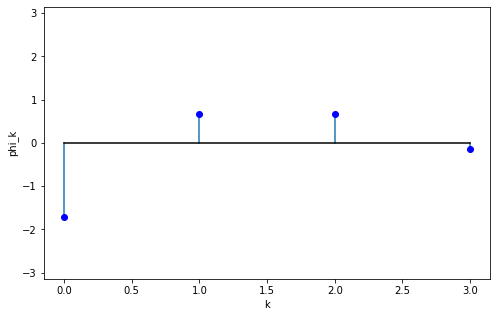

In [ ]:
PlotQSPPhases(ang_seq)

/content/drive/MyDrive/Telecom/PRIM/master/pyqsp/response.py:208: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(phiset, markerfmt='bo', basefmt='k-')


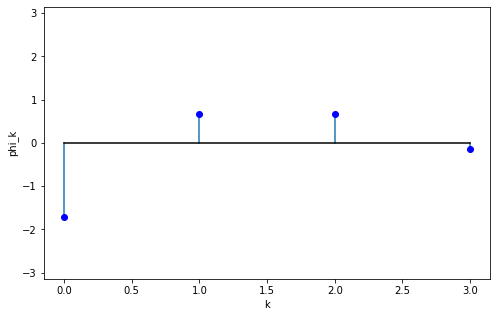

In [ ]:
PlotQSPPhases(ang_seq)

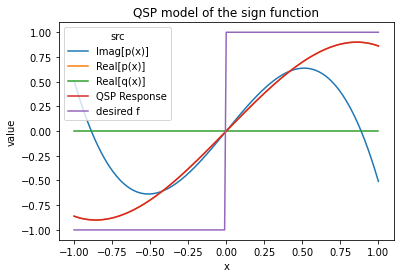

In [ ]:
PlotQSPResponse(ang_seq, target=lambda x: np.sign(x), signal_operator="Wx", title="QSP model of the sign function", plot_real_only=True, show_qsp_model_plot=True)

#**2) Grover as QSVT**

In [ ]:
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector
from qiskit.opflow import I, X, PrimitiveOp
from qiskit import * 
from qiskit.visualization import *
import pdflatex
import numpy as np

##**2.1) Uniform Superposition**

In [ ]:
nqubits = 5
qc = QuantumCircuit(nqubits)
zero_state = Statevector([1]+[0 for i in range(2**(nqubits-1) - 1)],dims=2**(nqubits-1))
projector = PrimitiveOp(zero_state.to_operator())
projector = PrimitiveOp(zero_state.to_operator())


**Projector controlled not - (0-state)**

In [ ]:
Id = PrimitiveOp(np.eye(2**(nqubits-1)))
projector_controlled_not = (projector ^ X) + ((Id- projector) ^ I)

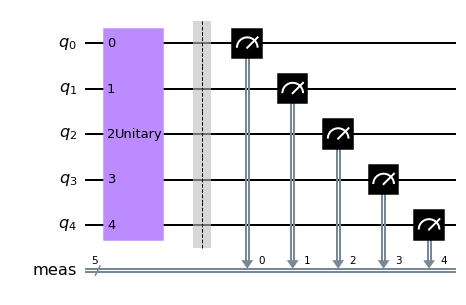

In [ ]:
qc = QuantumCircuit(nqubits)
qc.unitary(projector_controlled_not, list(range(nqubits)))
qc.measure_all()
qc.draw('mpl')

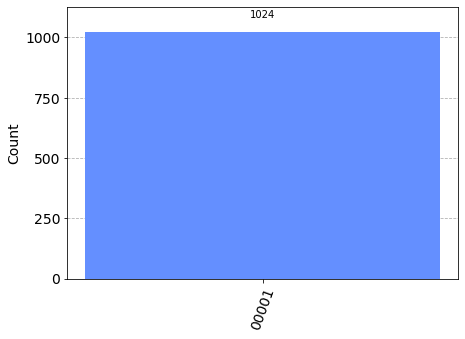

In [ ]:
backend = Aer.get_backend("qasm_simulator")
results = execute(qc, backend, shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)

**Projector controlled phase - (Uniform superposition projector)**

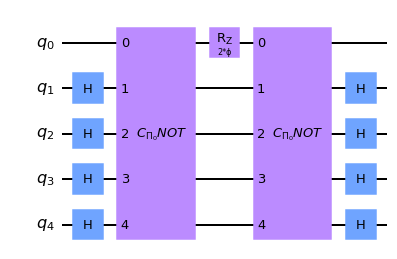

In [ ]:
phi = Parameter('ϕ')
qc = QuantumCircuit(nqubits)
for k in range(1,nqubits):
  qc.h(k)
qc.unitary(projector_controlled_not, list(range(nqubits)), label = ' $C_{\Pi_{0}}NOT$  ')
qc.rz(2*phi, 0)
qc.unitary(projector_controlled_not, list(range(nqubits)), label = ' $C_{\Pi_{0}}NOT$  ')
for k in range(1,nqubits):
  qc.h(k)
qc.draw('mpl')

We are using $R_Z(2\phi)$, because we want to apply $exp(-i\phi Z)$. Since Qiskit have the rotation operator defined as:

$$R_Z(\Phi) = exp\left(\frac{-i\Phi Z}{2}\right)$$

$$R_Z(2\phi) = exp\left(\frac{-i2\phi Z}{2}\right) = exp(-i\phi Z)$$


In [ ]:
def projControlPhase_uni(phi, nqubits, index = False):
  qc = QuantumCircuit(nqubits)
  zero_state = Statevector([1]+[0 for i in range(2**(nqubits-1) - 1)],dims=2**(nqubits-1))
  projector = PrimitiveOp(zero_state.to_operator())
  projector = PrimitiveOp(zero_state.to_operator())

  Id = PrimitiveOp(np.eye(2**(nqubits-1)))
  projector_controlled_not = (projector ^ X) + ((Id- projector) ^ I)


  for k in range(1,nqubits):
    qc.h(k)

  qc.unitary(projector_controlled_not, list(range(nqubits)))
  qc.rz(2*phi, 0)
  qc.unitary(projector_controlled_not, list(range(nqubits)))
  
  for k in range(1,nqubits):
    qc.h(k)

  aux = qc
  proj_uni = qc.to_gate()
  if(index):
    proj_uni.name = " $\Pi_{\Psi_0}$(%.3f)  "%phi
  else:
    proj_uni.name = " $\Pi_{\Psi_0}(\phi)$  "

  return proj_uni

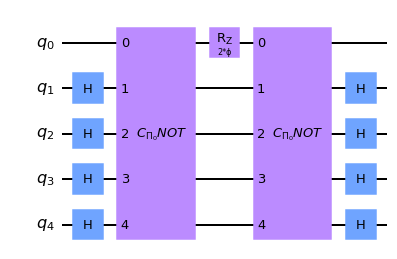

In [ ]:
q = 6
circuit = QuantumCircuit(q)
gate = projControlPhase_uni(np.pi, q)
circuit.append(gate, list(range(q)))
circuit.measure_all()
qc.draw('mpl')


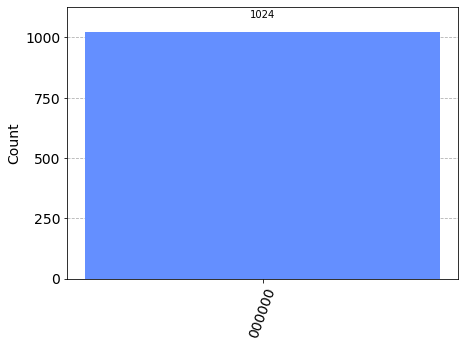

In [ ]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

##**2.2) Marked Element**

**Projector controlled not - (Marked element projector)**

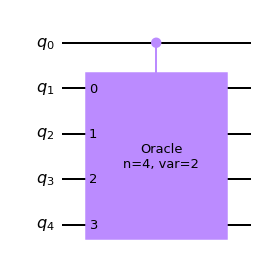

In [ ]:
from qiskit_textbook.problems import grover_problem_oracle
nqubits = 5
qc1 = QuantumCircuit(nqubits)
oracle = grover_problem_oracle(nqubits-1, variant=2)  #Has 1 solution
controlled_oracle = oracle.to_gate().control(1)
qc1.append(controlled_oracle,list(range(nqubits)))
qc1.draw('mpl')

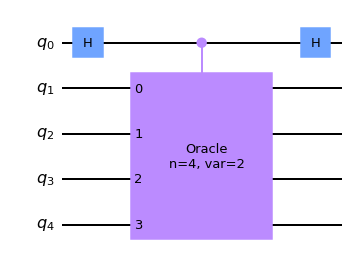

In [ ]:
qc2 = QuantumCircuit(nqubits)
oracle = grover_problem_oracle(nqubits-1, variant=2)  #Has 1 solution
controlled_oracle = oracle.to_gate().control(1)
qc2.h(0)
qc2.append(controlled_oracle,list(range(nqubits)))
qc2.h(0)

projMarked_controlled_not = qc2.to_gate()
projMarked_controlled_not.name = " $C_{\Pi_{w}}NOT$  "
qc2.draw('mpl')

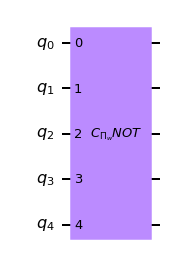

In [ ]:
qc3 = QuantumCircuit(nqubits)
qc3.append(projMarked_controlled_not,list(range(nqubits)))
qc3.draw('mpl')

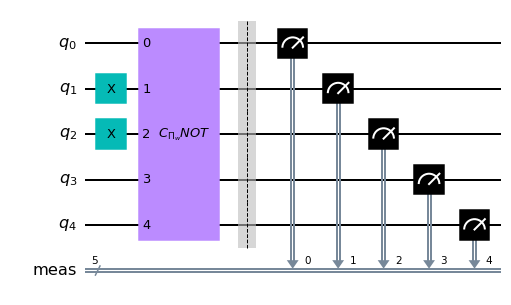

In [ ]:
qc = QuantumCircuit(nqubits)
qc.x(1)
qc.x(2)
qc.append(projMarked_controlled_not,list(range(nqubits)))
qc.measure_all()
qc.draw('mpl')

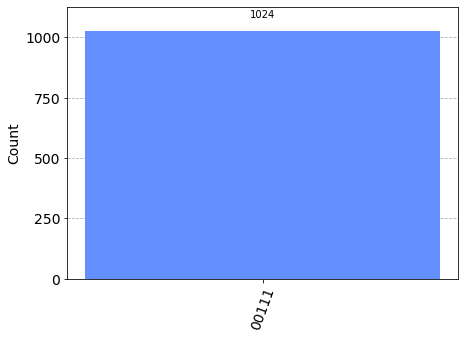

In [ ]:
backend = Aer.get_backend("qasm_simulator")
results = execute(qc, backend, shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)

**Projector controlled phase - (Marked Element)**

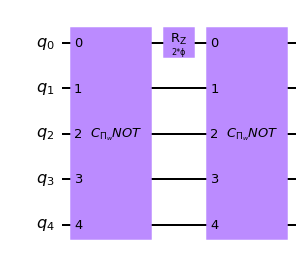

In [ ]:
qc = QuantumCircuit(nqubits)

phi = Parameter('ϕ')
qc.append(projMarked_controlled_not,[0,1,2,3,4])
qc.rz(2*phi, 0)
qc.append(projMarked_controlled_not,[0,1,2,3,4])
qc.draw('mpl')

In [ ]:
def projControlPhase_marked(phi, nqubits = 5, index = False, oracle = grover_problem_oracle(4, variant=2)):
  qc = QuantumCircuit(nqubits)
  controlled_oracle = oracle.to_gate().control(1)

  qc.h(0)
  qc.append(controlled_oracle,list(range(nqubits)))
  qc.h(0)
  qc.rz(2*phi, 0)
  qc.h(0)
  qc.append(controlled_oracle,list(range(nqubits)))
  qc.h(0)

  proj_marked = qc.to_gate()
  if(index):
    proj_marked.name = " $\Pi_{w}$(%.3f)  "%phi
  else:
    proj_marked.name = " $\Pi_{w}(\phi)$  "
    
  return proj_marked

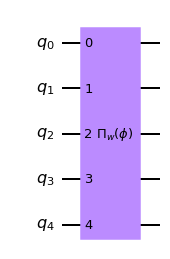

In [ ]:
nqubits = 5
circuit = QuantumCircuit(nqubits)
circuit.append(projControlPhase_marked(np.pi, nqubits, oracle = grover_problem_oracle(nqubits-1, variant=2)), list(range(nqubits)))
circuit.draw('mpl')

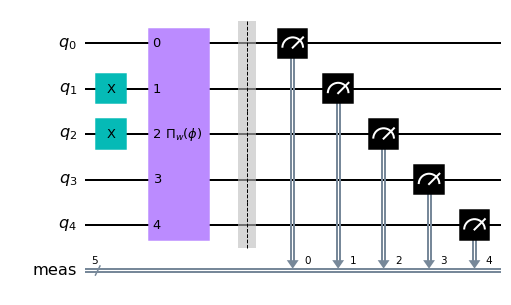

In [ ]:
qc = QuantumCircuit(nqubits)
qc.x(1)
qc.x(2)
qc.append(projControlPhase_marked(np.pi/2, nqubits), list(range(nqubits)))
qc.measure_all()
qc.draw('mpl')

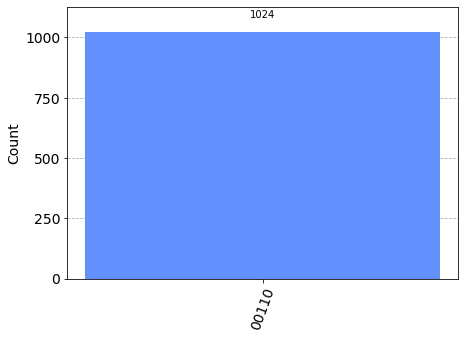

In [ ]:
backend = Aer.get_backend("qasm_simulator")
results = execute(qc, backend, shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)

##**2.3) Choosing the Polynomial**

In [ ]:
d = 19
poly = PolySign()
pcoefs = poly.generate(degree= d, delta=10, ensure_bounded=False, return_scale=False)
ang_seq = QuantumSignalProcessingPhases(pcoefs, method = 'tf')

[pyqsp.poly.PolySign] degree=19, delta=10
[PolyTaylorSeries] average error = 0.019957860604301596 in the domain [-1, 1] using degree 19


/content/drive/MyDrive/Telecom/PRIM/master/pyqsp/response.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  def qsp_op(phi): return np.array(


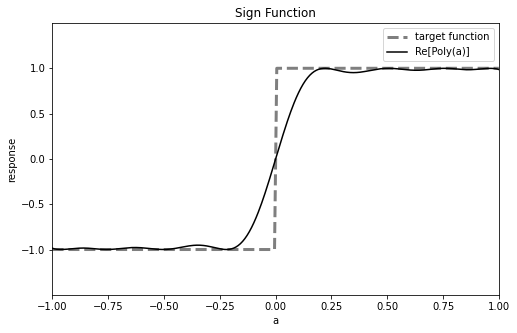

In [ ]:

PlotQSPResponse(ang_seq, target=lambda x: np.sign(x), signal_operator="Wx", title="Sign Function", plot_real_only=True, plot_probability=False)

In [ ]:
d = 13
poly = StringPolynomial("np.tanh(100*x)",d)
phisetTanh = QuantumSignalProcessingPhases(poly, method='tf')

/content/drive/MyDrive/Telecom/PRIM/master/pyqsp/response.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  def qsp_op(phi): return np.array(


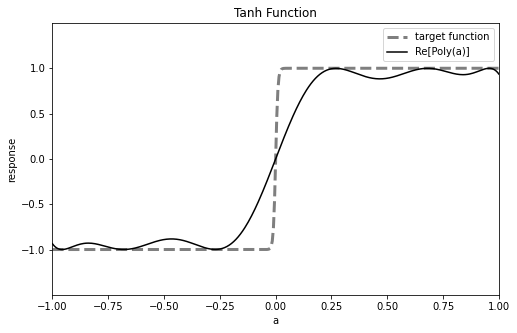

In [ ]:
PlotQSPResponse(phisetTanh, target=poly, signal_operator="Wx", title= 'Tanh Function', plot_real_only=True, plot_probability= False)

/content/drive/MyDrive/Telecom/PRIM/master/pyqsp/response.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  def qsp_op(phi): return np.array(


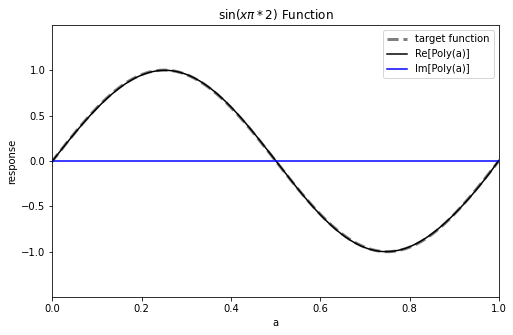

In [ ]:
d = 9
poly = StringPolynomial("np.sin(2*np.pi*x)",d)
phisetSin= QuantumSignalProcessingPhases(poly, method='tf')
PlotQSPResponse(phisetSin, target=poly, signal_operator="Wx", title= 'sin($x\pi*2$) Function', plot_real_only=False, plot_positive_only=True)

In [ ]:
x = ComputeQSPResponse([1], phisetSin, signal_operator="Wx")['pdat'][0]
print(float(np.abs(x)**2))

3.416031300051969e-05


/content/drive/MyDrive/Telecom/PRIM/master/pyqsp/response.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  def qsp_op(phi): return np.array(


In [ ]:
def phisetChebyshev(n):
  logQubits = n - 1
  d = (2*logQubits) - 1
  if logQubits > 6 and logQubits < 10:
    for i in range(1, logQubits - 6 + 1):
        d = d + (2 * i)
  
  phiset = []
  phiset.append(0)
  phiset.append((1-d)*(np.pi/2))
  for i in range(1,d):
    phiset.append(np.pi/2)
  
  return phiset, d

Text(0.5, 1.0, 'Chebyshev Polynomial')

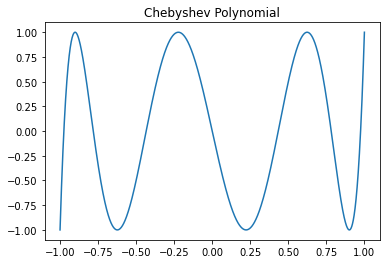

In [ ]:
v, d = phisetChebyshev(5)

a = np.linspace(-1, 1, 10000)

test = np.polynomial.Chebyshev((0,0,0,0,0,0,0,1))
y = test(a)

plt.figure()
plt.plot(a, y)
plt.title("Chebyshev Polynomial")

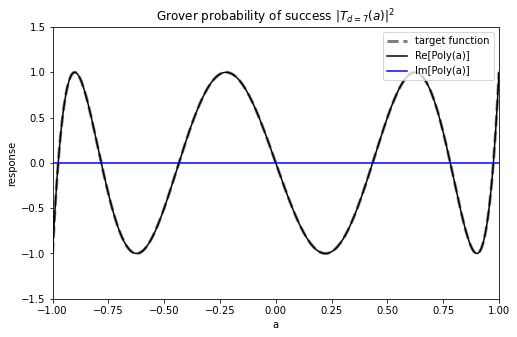

In [ ]:
n = 5
phisetCheb,d = phisetChebyshev(n)
poly = np.polynomial.Chebyshev((0,0,0,0,0,0,0,1))
PlotQSPResponse(CorrectingPhasesW(phisetCheb),  target = poly ,signal_operator="Wx", measurement="z", title= 'Grover probability of success $|T_{d=7}(a)|^2$', plot_real_only=False, plot_positive_only=False, plot_probability=False, plot_tight_y=False)

##**2.4) Building the Circuit**

In [ ]:
def AmpAmplifictaionQSVT(n, ang_seq, myOracle = grover_problem_oracle(4, variant=2)):
  #q0 - ancilla qubit
  #q1,q2,q3,q4,...qn-1 -  logical qubits
  qc = QuantumCircuit(n, n-1)

  #Degree of the polynomial
  d = len(ang_seq)-1

  #Prepare my angles
  phi = []
  for i in ang_seq:
    phi.append(float(i))
  

  
  for k in range(1,n):
    qc.h(k)


  for i in range(d,0,-1):
    if(i%2 == 0):
      qc.append(projControlPhase_uni(phi[i], n, True), list(range(n)))
    else:
      qc.append(projControlPhase_marked(phi[i], n, True, oracle=myOracle), list(range(n)))


  for i in range(1,n):
   qc.measure(i, i-1)

  print('For a phi vector: ', phi)
  print('\n')
  return qc

In [ ]:
def CorrectingPhasesW(phiset):
  d = len(phiset) - 1
  Correct_phiset = np.zeros(d+1)

  Correct_phiset[d] = (np.pi/4)
  Correct_phiset[0] = phiset[1] - (d*np.pi/2) +(np.pi/4)
  for k in range(1,d):
    Correct_phiset[k] = phiset[k+1] + np.pi/2

  return list(Correct_phiset)

def CorrectingPhasesRef(phiset):
  d = len(phiset) - 1
  Correct_phiset = np.zeros(d+1)

  Correct_phiset[0] = 0
  Correct_phiset[1] = phiset[0] + phiset[d] + (d-1)*(np.pi/2)
  for k in range(2,d+1):
    Correct_phiset[k] = phiset[k-1] - (np.pi/2)

  return Correct_phiset

#**3) Testing**

##**3.1) Sin Function**

For a phi vector:  [0.0, 13.880332946777344, -1.137695074081421, 0.9159148931503296, 0.8847872018814087, 1.0391188859939575, 1.0391217470169067, 0.8847936391830444, 0.9159208536148071, -1.1376910209655762]




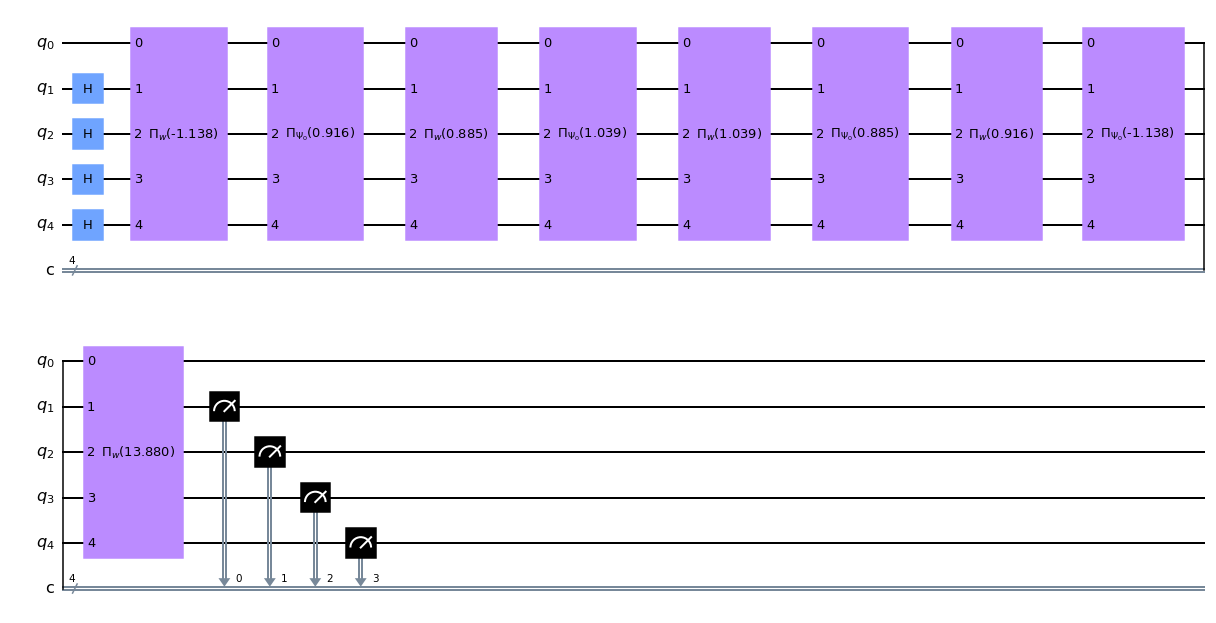

In [ ]:
#Sin function
qcSin = AmpAmplifictaionQSVT(5, CorrectingPhasesRef(phisetSin))
qcSin.draw('mpl')

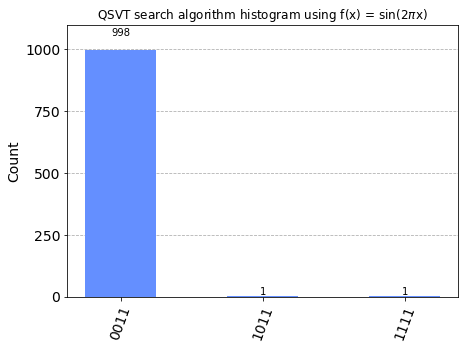

In [ ]:
#Sin function
backend = Aer.get_backend("qasm_simulator")
results = execute(qcSin, backend, shots=1000).result()
counts = results.get_counts()
plot_histogram(counts, title= 'QSVT search algorithm histogram using f(x) = sin(2$\pi$x)')

##**3.2) Tanh Function**

For a phi vector:  [0.0, 21.25836944580078, -0.9472001194953918, -0.5421972274780273, -1.0546557903289795, -1.0783418416976929, -1.9227313995361328, 2.577103614807129, -0.5279927253723145, -1.9136871099472046, -1.0678331851959229, -1.074816107749939, -0.5506757497787476, -0.9479726552963257]




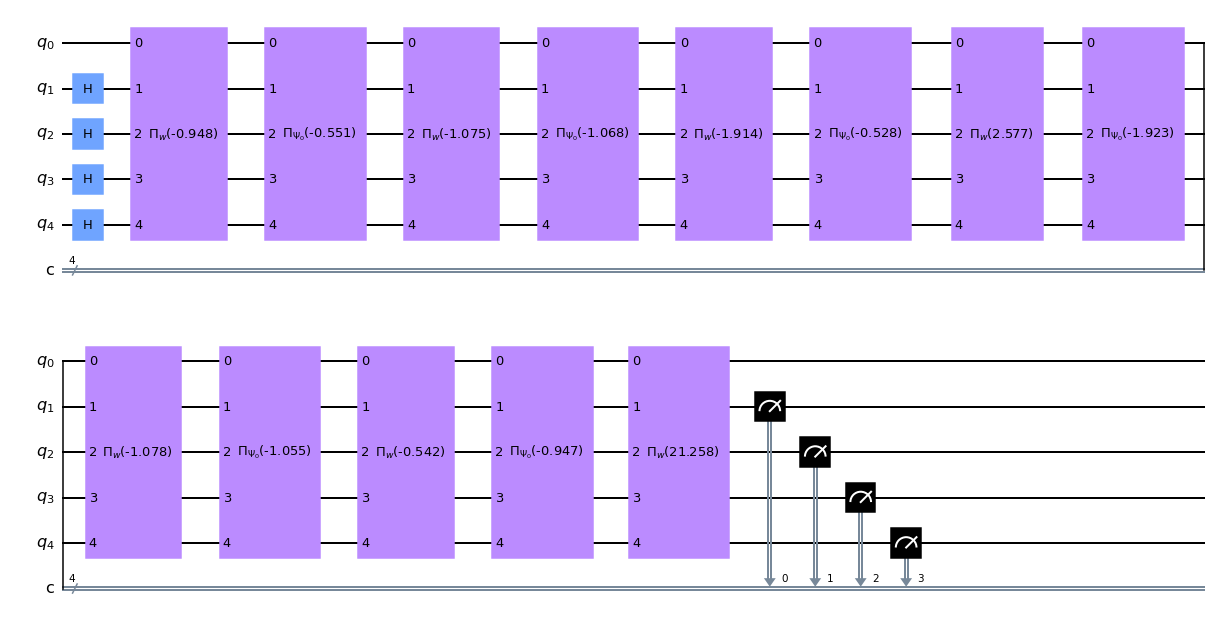

In [ ]:
#Tanh Function
qcTanh = AmpAmplifictaionQSVT(5, CorrectingPhasesRef(phisetTanh))
qcTanh.draw('mpl')

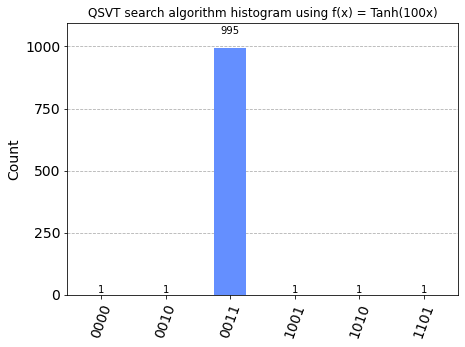

In [ ]:
#Tanh Function
backend = Aer.get_backend("qasm_simulator")
results = execute(qcTanh, backend, shots=1000).result()
counts = results.get_counts()
plot_histogram(counts, title= 'QSVT search algorithm histogram using f(x) = Tanh(100x)')

In [ ]:
x = ComputeQSPResponse([0.25], phisetTanh, signal_operator="Wx")['pdat'][0]
print(float(np.abs(x)**2))

0.9909786538053441


/content/drive/MyDrive/Telecom/PRIM/master/pyqsp/response.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  def qsp_op(phi): return np.array(


##**3.3) Chebyshev Polynomials**

For a phi vector:  [0.0, -9.42477796076938, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966]




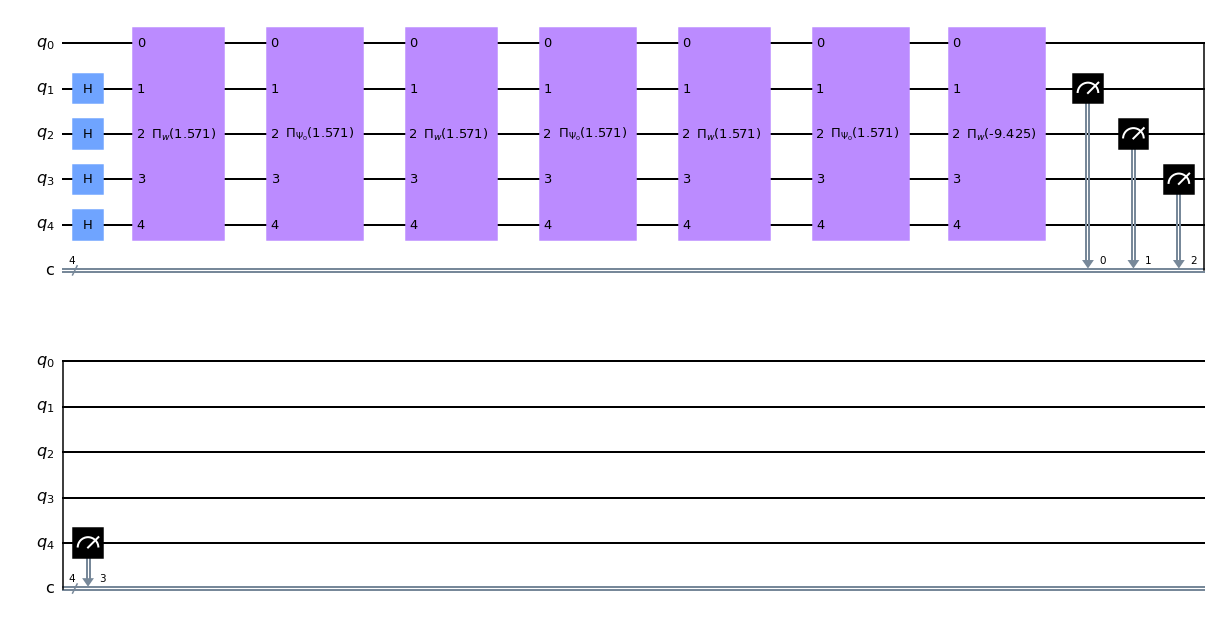

In [ ]:
#Chebyshev Function
n = 5
phisetCheb,d = phisetChebyshev(n)
qcCheb = AmpAmplifictaionQSVT(n, phisetCheb, myOracle = grover_problem_oracle(n-1, variant=2))
qcCheb.draw('mpl')

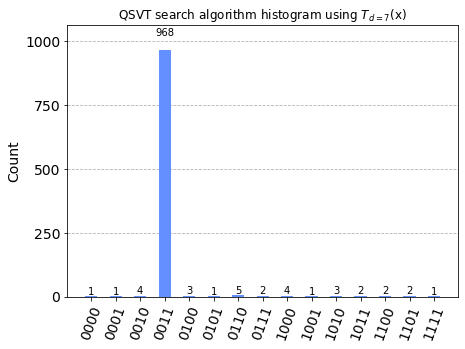

In [ ]:
#Chebyshev Function
backend = Aer.get_backend("qasm_simulator")
results = execute(qcCheb, backend, shots=1000).result()
counts = results.get_counts()
plot_histogram(counts, title= 'QSVT search algorithm histogram using $T_{d = 7}$(x)')

##**3.4) Sign Function**


For a phi vector:  [0.0, 31.43946075439453, -0.47581589221954346, -1.0668044090270996, -1.0007729530334473, -1.9032237529754639, -2.3953957557678223, -0.6295062303543091, 2.1375136375427246, 1.75458562374115, 1.4438775777816772, -0.8487796783447266, 2.6911683082580566, 1.8667744398117065, -1.6891086101531982, 0.3397103548049927, 1.7568494081497192, 1.930197834968567, 0.9225670099258423, 1.2593008279800415]




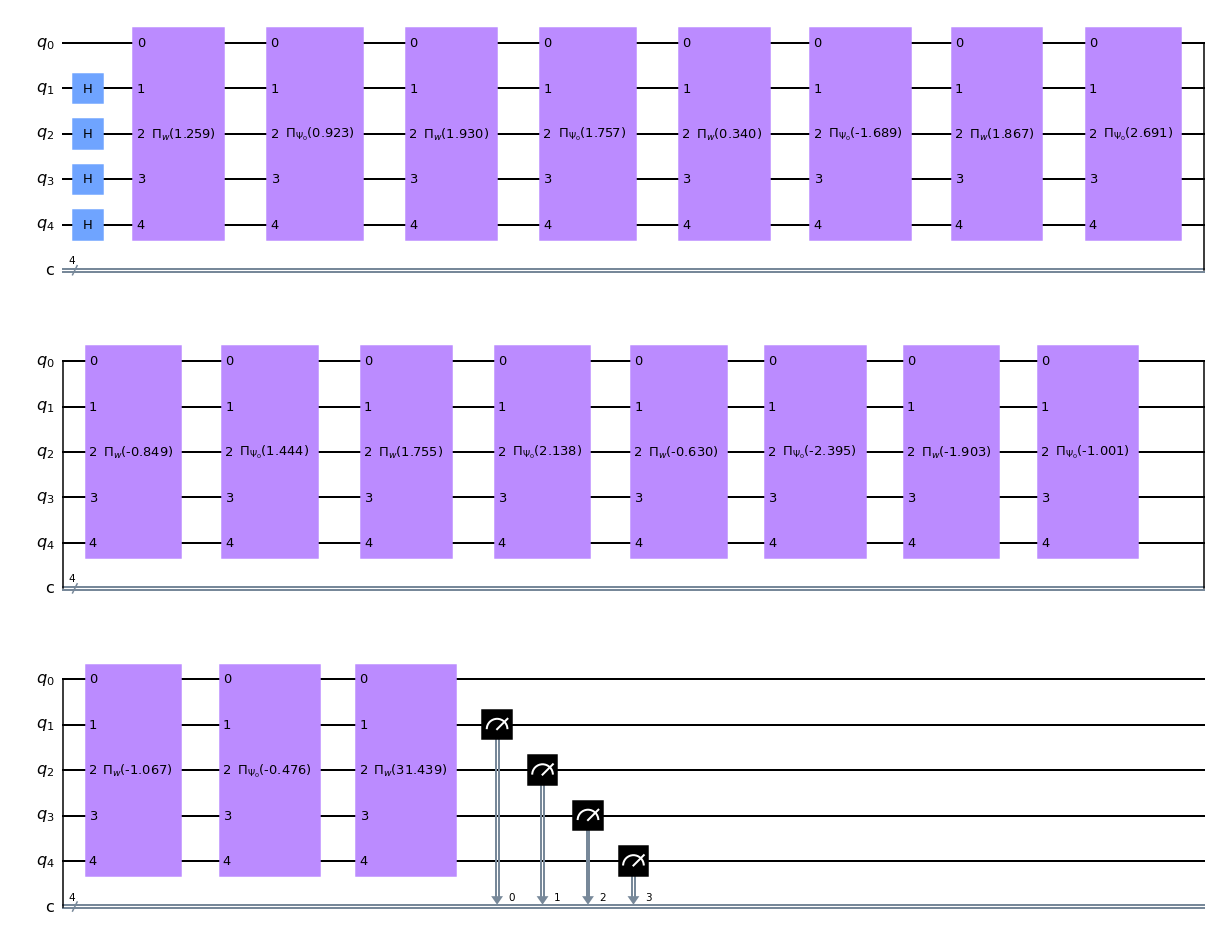

In [ ]:
#Sign function
n = 5
qcSign = AmpAmplifictaionQSVT(n, CorrectingPhasesRef(ang_seq), myOracle = grover_problem_oracle(n-1, variant=2))
qcSign.draw('mpl')

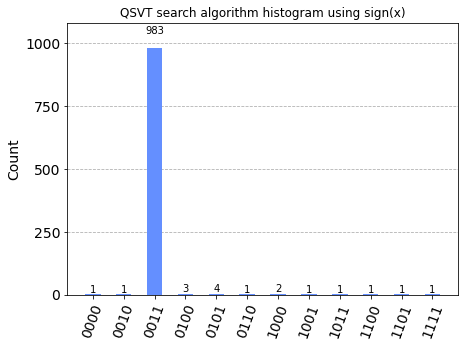

In [ ]:
#Sign Function
backend = Aer.get_backend("qasm_simulator")
results = execute(qcSign, backend, shots=1000).result()
counts = results.get_counts()
plot_histogram(counts, title= 'QSVT search algorithm histogram using sign(x)')

In [ ]:
x = ComputeQSPResponse([0.25], ang_seq, signal_operator="Wx")['pdat'][0]
print(float(np.abs(x)**2))

0.9843150683325362


/content/drive/MyDrive/Telecom/PRIM/master/pyqsp/response.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  def qsp_op(phi): return np.array(


#**4) Fixed Point Amplitude Amplification** 

In [ ]:
fp = FPSearch()
phisetFp = fp.generate(d=4, delta=0.5)

x = ComputeQSPResponse([0.25], phisetFp, signal_operator="Wz", measurement = 'x')['pdat'][0]
print(float(np.abs(x)**2))

In [ ]:
def ListPhase(ang_seq):
    phi = []
    for i in ang_seq:
      phi.append(float(i))
    return phi

In [ ]:
phisetFp = ListPhase(phisetFp)
PlotQSPResponse(phisetFp, signal_operator="Wz", measurement= 'x',title= 'Probability Fixed Point Function',plot_probability = True, plot_tight_y=True ,plot_positive_only=False)

In [ ]:
phisetFp[0:8]

In [ ]:
A = CorrectingPhasesRef(phisetFp[0:8])
print(A)

In [ ]:
#Fp Function
backend = Aer.get_backend("qasm_simulator")
results = execute(qcFp, backend, shots=1000).result()
counts = results.get_counts()
plot_histogram(counts, title= 'QSVT search algorithm histogram using f(x) = Fp')